# K Means Clsutering
John Lubisich

## Background

### About the Data

The dataset used in this assignment was about the top 44 ranked cities by healthy lifestyles in 2021; https://www.kaggle.com/datasets/pawarmukesh/healthy-life-style-city-2021. Having a healthy lifestyle was determined by features like sunshine hours, cost of a bottle of water, obesity levels, life expectancy, pollution index score, annual average hours worked, happiness levels, outdoor activities, number of take out places and cost of a monthly gym membership. Each city was also given a rank based on their healthy lifestyle within the dataset.

### Purpose and Goal

The purpose for this analysis was to use the K-means clustering algorithm to identify similar groups of cities and observe their similar features and thus healthy lifestyles. K-means clustering can also help us further understand correlations between different features and their impact on the healthy lifestyle. Additionally, concusion could be drawn based on each country's ranking to see what features are the most important for a high ranking or what features have the average highest ranking.

## Loading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets/healthy_lifestyle_city_2021.csv')
df

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


First I imported the neccessary libraries needed for this analysis and also loaded in the data.

## Cleaning the Data

In [3]:
x = df[["Life expectancy(years) (Country)","Pollution(Index score) (City)", "Outdoor activities(City)"]]
x = x.drop(6) #droped one row since it was a null value
x['Pollution(Index score) (City)'] = x['Pollution(Index score) (City)'].astype(float)

Next I analyzed the data and decided to take out certain columns for this analysis. I wanted to clearly visualize the K-clusters so I reduced the amount of features so that I could decrease the 'curse of dimentionality'. With less features and thus dimensions on the plot, I would be able to simplify the visuals from 8 dimensions to 3, making it easier for the audience to understand. I took out the columns that I thought were either unneccessary compared to others, or were too closely related to another feature. The final dataset included Life expectancy, Pollution index, and outdoor activities for scaling a healthy lifestyle. Another reason for removing some columns were because of the large amount of null values and removing too many would decrease the number of observations in this already sparse dataset.

## K-Means Clustering

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

Used a scaler to equalize feature importance so each feature would be able to contribute equally rather than the feature with the largest scale dominate.

Text(0, 0.5, 'Sum of squared distance')

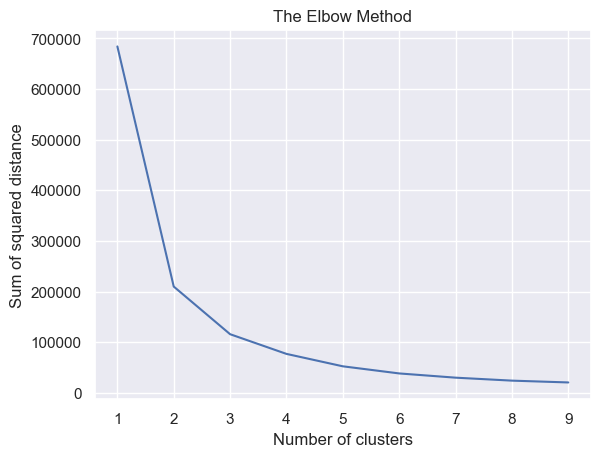

In [5]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')

I used the elbow method to determine how many clusters I should have, and found that the most optimal number was 3.

In [6]:
kmeans = KMeans(3)
kmeans.fit(X_scaled)

KMeans(n_clusters=3)

In [7]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1,
       2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 2, 2, 1, 1, 0])

Array of the different clusters.

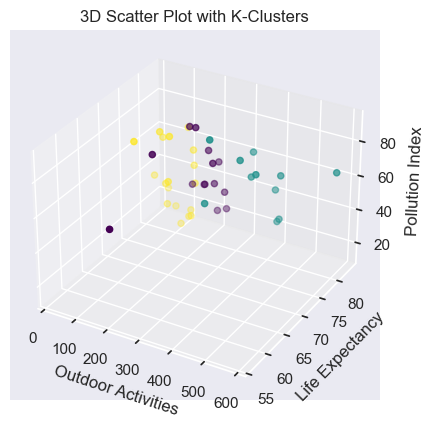

In [8]:
feature1 = x["Outdoor activities(City)"]
feature2 = x["Life expectancy(years) (Country)"]
feature3 = x["Pollution(Index score) (City)"]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature1, feature2, feature3, c=identified_clusters, cmap='viridis') 
ax.set_xlabel('Outdoor Activities')
ax.set_ylabel('Life Expectancy')
ax.set_zlabel('Pollution Index')
ax.set_title('3D Scatter Plot with K-Clusters')
plt.show()

Finally I was able to make a model of the clusters. As you you can see in the visual above, there are three clusters grouped in different areas of the graph shown in three dimensions. It looks like the purple and yellow cluster have the most overlap which may mean their centroids are relatively close compared to the lighter aqua color on the far right. There appears to be a few outliers like the purple dot on the far left and the aqua on the far right. 

In [9]:
data_with_clusters = x.copy()
data_with_clusters['Clusters'] = identified_clusters 

In [10]:
names = df['City']
rank = df['Rank']
data_with_clusters.insert(0,"Rank", rank)
data_with_clusters.insert(0, "City", names)
data_with_clusters

,City,Rank,Life expectancy(years) (Country),Pollution(Index score) (City),Outdoor activities(City),Clusters
0,Amsterdam,1,81.2,30.93,422,1
1,Sydney,2,82.1,26.86,406,1
2,Vienna,3,81.0,17.33,132,2
3,Stockholm,4,81.8,19.63,129,2
4,Copenhagen,5,79.8,21.24,154,2
5,Helsinki,6,80.4,13.08,113,2
7,Berlin,8,80.6,39.41,254,0
8,Barcelona,9,82.2,65.19,585,1
9,Vancouver,10,81.7,24.26,218,0
10,Melbourne,11,82.1,25.90,243,0


In [11]:
df_sorted = data_with_clusters.sort_values(by='Clusters')
df_sorted

,City,Rank,Life expectancy(years) (Country),Pollution(Index score) (City),Outdoor activities(City),Clusters
43,Mexico City,44,76.4,82.78,192,0
24,Los Angeles,25,78.8,66.07,223,0
25,Mumbai,26,67.3,82.84,187,0
15,Madrid,16,82.2,52.68,216,0
14,Toronto,15,81.7,37.83,174,0
13,Buenos Aires,14,75.9,52.64,246,0
29,Chicago,30,78.8,43.33,171,0
11,Beijing,12,75.4,85.43,223,0
10,Melbourne,11,82.1,25.90,243,0
30,Hong Kong,31,75.4,67.46,277,0


In [12]:
group_means_life = df_sorted.groupby('Clusters')['Life expectancy(years) (Country)'].mean()
print(group_means_life)
group_means_pollution = df_sorted.groupby('Clusters')['Pollution(Index score) (City)'].mean()
print(group_means_pollution)
group_means_outdoor = df_sorted.groupby('Clusters')['Outdoor activities(City)'].mean()
print(group_means_outdoor)
group_means_rank = df_sorted.groupby('Clusters')['Rank'].mean()
print(group_means_rank)

Clusters
0    76.528571
1    78.063636
2    79.244444
Name: Life expectancy(years) (Country), dtype: float64
Clusters
0    54.987143
1    58.426364
2    43.652778
Name: Pollution(Index score) (City), dtype: float64
Clusters
0    218.571429
1    396.727273
2    108.666667
Name: Outdoor activities(City), dtype: float64
Clusters
0    22.500000
1    23.363636
2    22.833333
Name: Rank, dtype: float64


## Analysis

After looking at the means of each feature by cluster the result I could see that where the clusters varied greatly were by Outdoor activities. Group 0 had a mean of about 397, group 1 was 95, and group 2 was 207. The clusters also had somewhat varying averages within the pollution index score (The pollution index score is considered better the lower it is). That being said, group 0 had the lowest by far, followed by group 2 then group 3. The average life expectancy varied the least between the different clusters. Furthermore, I also calculated the average city rank between each cluster and found that they were all extremely close, 2 being the highest, then 0 then 1. This was interesting because out of the three features, group 2 was consistently in 2nd for the averages. What I can takeaway from this is that despite never having the top average, since group 2 was consistently good in each category, this could be why it was able to edge out the highest average rank. What I can draw from this is that in order for a city to have one of the top healthy lifestyles, it needs multiple great things that contribute to it being healthy, rather than just one or two. A city needs to be diverse in its resources and anemeities to produce the most optimal healthy lifestlye.

## Conclusion

By using K-Means Clustering on features of the worlds healthies cities I was able to discover why and how the healthy cities are ranked. In essence, cities need a vast blend of elements that all contribute to a healthy lifestyle. Since these are all the highest ranked on the list of top cities with healthy lifestyles, I could acknowledge that each observation in this dataset did this to some degree. This information could be important for urban planners so they can help design new cities or help upgrade current cities with many different beneficial components that all strive towards fostering environments where residents are able to have the oppurtunity of healthy lifestyles. 